
WELCOME!

In this assignment, you must apply EDA processes for the development of predictive models. Handling outliers, domain knowledge and feature engineering will be challenges.

Also, this project aims to improve your ability to implement algorithms for Multi-Class Classification. Thus, you will have the opportunity to implement many algorithms commonly used for Multi-Class Classification problems.

Before diving into the project, please take a look at the determines and tasks.


# Determines

Dataset contains tree observations from four areas of one national forest district. This dataset includes information on tree type, shadow coverage, distance to nearby landmarks, soil type, and local topography. The goal of the project is to build a model that predicts what types of trees grow in an area. The Forest Dataset contains approximately 600 thousand lines, also you can easily find many information about it on the web (especially Kaggle).

-------
To achieve high prediction success, you must understand the data well and develop different approaches that can affect the dependent variable.

Firstly, try to understand the dataset column by column using pandas module. Do research within the scope of domain (forest, trees) knowledge on the internet to get to know the data set in the fastest way.

You should implement cleaning, handling with outliers and missing values using Pandas, NumPy and other required modules for the best result in modeling. You should do Feature Engineering.

After that, your final dataset with the new variables you have created will be ready for model building. You will implement Support Vector Machine, XGBoost, Random Forest, Desicion Tree algorithms. Also, evaluate the success of your models with appropriate performance metrics.

At the end of the project, create a chart comparing the performance of all models and choose the most successful model.


# Tasks

1. Exploratory Data Analysis (EDA)

    Import Libraries, Load Dataset, Exploring Data

    i. Import Libraries

    ii. Load Dataset

    iii. Explore Data

2. Data Cleaning

    Detect Missing Values and Outliers

    i. Missing Value Detection

    ii. Outlier Detection

    Deal with Outliers

    i. Drop Outliers

3. Feature Engineering
4. Prediction (Multi-class Classification)

    Import libraries
    Data Preprocessing
    Implement SVM Classifer
    Implement Decision Tree Classifier
    Implement Random Forest Classifer
    Implement XGBoost Classifer
    Compare The Models


### 1. Exploratory Data Analysis
Import Libraries, Load Dataset, Exploring Data
i. Import Libraries

Besides Numpy and Pandas, you need to import the necessary modules for data visualization, data preprocessing, Model building and tuning.

Note: Check out the course materials.


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
# from scipy.stats import zscore
# from scipy import stats
# from numpy import percentile
font_title = {'family': 'times new roman', 'color': 'darkred', 
              'weight': 'bold', 'size': 14}
warnings.filterwarnings('ignore')
sns.set_style("whitegrid")
plt.rcParams['figure.dpi'] = 100

ii. Load Dataset

In [4]:
df0 = pd.read_csv("treetypes.csv")
df = df0.copy()
df.head()

,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,...,Soil_Type_32,Soil_Type_33,Soil_Type_34,Soil_Type_35,Soil_Type_36,Soil_Type_37,Soil_Type_38,Soil_Type_39,Soil_Type_40,Cover_Type
0,2696,123,10,212,48,2245,237,231,123,2113,...,0,0,0,0,0,0,0,0,0,6
1,3269,110,19,134,40,3734,249,216,88,3960,...,0,0,0,0,0,0,1,0,0,1
2,3283,322,18,346,104,4369,170,217,185,1330,...,0,0,0,0,0,0,1,0,0,7
3,2847,89,31,270,175,1320,248,173,29,889,...,0,0,0,0,0,0,0,0,0,5
4,3248,93,12,507,118,570,239,221,110,945,...,0,0,0,0,0,0,0,0,0,7


### ii. Explore Data

- Focus on numerical and categorical data
- Detect Number of Unique values of each column
- Focus on Target Variable (Cover_Type)
    - Detect relationships and correlations between independent variables and target variable.
    - It may be nice to visualize the class frequencies of the target variable.
- Detect relationships and correlations between independent variables. (You can prefer to keep only one of the highly correlated continuous variables.)
- Consider dropping features that contain little data or that you think will not contribute to the model.

In [5]:
pd.options.display.float_format = '{:,.10f}'.format

In [6]:
# df.info()
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Elevation,"250,000.0000000000","2,748.5051600000",418.3009745102,"1,859.0000000000","2,375.0000000000","2,753.0000000000","3,108.0000000000","3,857.0000000000"
Aspect,"250,000.0000000000",156.2121720000,109.6528467575,0.0000000000,65.0000000000,125.0000000000,260.0000000000,360.0000000000
Slope,"250,000.0000000000",16.3310520000,8.3174903244,0.0000000000,10.0000000000,15.0000000000,22.0000000000,65.0000000000
Horizontal_Distance_To_Hydrology,"250,000.0000000000",228.0940320000,209.6301534827,0.0000000000,66.0000000000,180.0000000000,330.0000000000,"1,390.0000000000"
Vertical_Distance_To_Hydrology,"250,000.0000000000",50.8978200000,61.0069671648,-163.0000000000,5.0000000000,32.0000000000,79.0000000000,598.0000000000
Horizontal_Distance_To_Roadways,"250,000.0000000000","1,719.9665760000","1,330.8176026101",0.0000000000,756.0000000000,"1,318.0000000000","2,294.0000000000","7,112.0000000000"
Hillshade_9am,"250,000.0000000000",212.3704880000,30.6545824544,0.0000000000,195.0000000000,220.0000000000,235.0000000000,254.0000000000
Hillshade_Noon,"250,000.0000000000",218.5107000000,22.6809470528,0.0000000000,206.0000000000,222.0000000000,235.0000000000,254.0000000000
Hillshade_3pm,"250,000.0000000000",134.5027640000,46.0338918280,0.0000000000,106.0000000000,137.0000000000,167.0000000000,252.0000000000
Horizontal_Distance_To_Fire_Points,"250,000.0000000000","1,521.7569040000","1,107.3783730901",0.0000000000,734.0000000000,"1,273.0000000000","1,998.0000000000","7,150.0000000000"


In [9]:
len(['Elevation', 'Aspect', 'Slope', 'Horizontal_Distance_To_Hydrology', 
     'Vertical_Distance_To_Hydrology', 'Horizontal_Distance_To_Roadways',
     'Hillshade_9am', 'Hillshade_Noon', 'Hillshade_3pm', 
     'Horizontal_Distance_To_Fire_Points'])

10

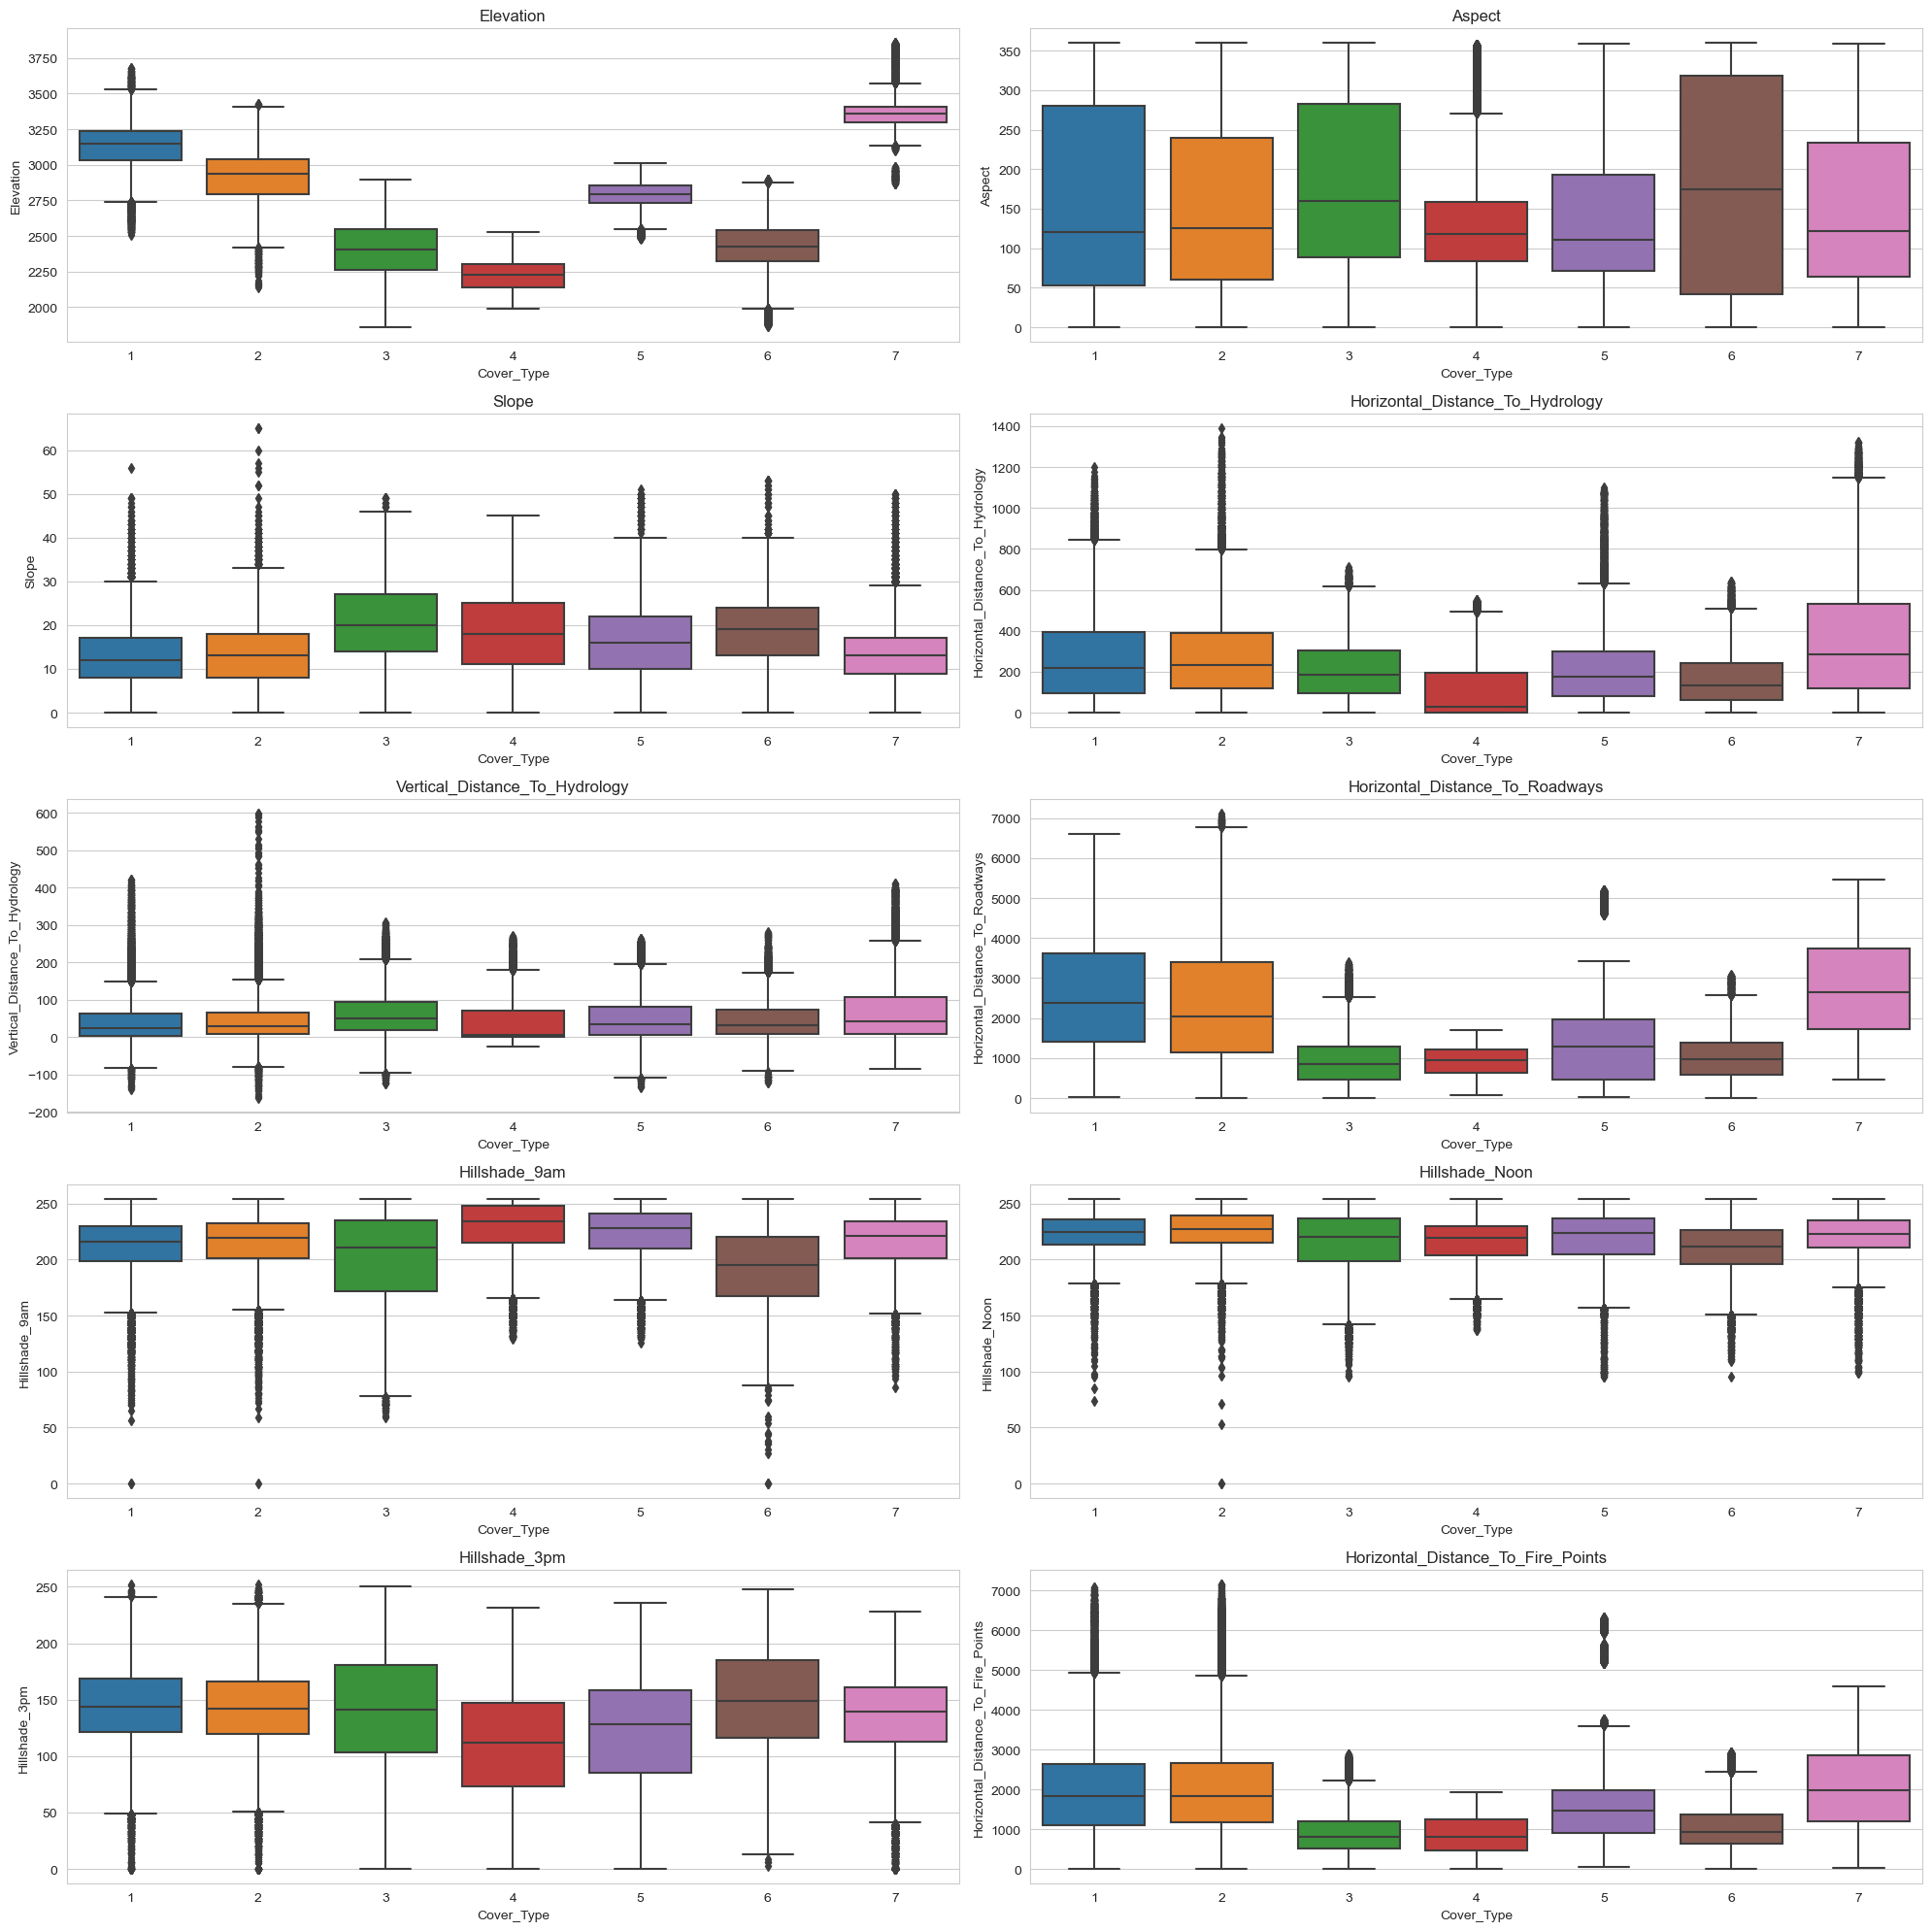

In [10]:
plt.figure(figsize=(20,20))
for i,col in enumerate([
    'Elevation', 'Aspect', 'Slope', 'Horizontal_Distance_To_Hydrology', 
    'Vertical_Distance_To_Hydrology', 'Horizontal_Distance_To_Roadways', 
    'Hillshade_9am', 'Hillshade_Noon', 'Hillshade_3pm', 
    'Horizontal_Distance_To_Fire_Points'],1):
    plt.subplot(5,2,i)
    # print("-----------",i,"--",col,"---------------")
    plt.title(col)
    sns.boxplot(y=df[col], x=df["Cover_Type"])
    plt.tight_layout()

In [11]:
for col in df.columns:
    print(f"Column {col:<35} has ---> {df[col].nunique():<6} unique values")

Column Elevation                           has ---> 1983   unique values
Column Aspect                              has ---> 361    unique values
Column Slope                               has ---> 59     unique values
Column Horizontal_Distance_To_Hydrology    has ---> 1294   unique values
Column Vertical_Distance_To_Hydrology      has ---> 578    unique values
Column Horizontal_Distance_To_Roadways     has ---> 6501   unique values
Column Hillshade_9am                       has ---> 207    unique values
Column Hillshade_Noon                      has ---> 165    unique values
Column Hillshade_3pm                       has ---> 253    unique values
Column Horizontal_Distance_To_Fire_Points  has ---> 6487   unique values
Column Wilderness_Area_1                   has ---> 2      unique values
Column Wilderness_Area_2                   has ---> 2      unique values
Column Wilderness_Area_3                   has ---> 2      unique values
Column Wilderness_Area_4                   has --->

<AxesSubplot:ylabel='Cover_Type'>

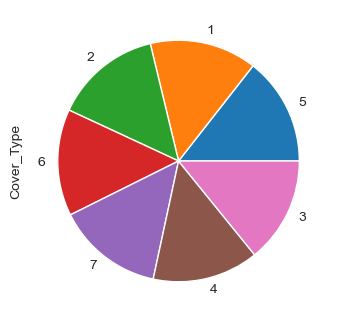

In [12]:
df.Cover_Type.value_counts().plot.pie()

In [13]:
lst = ['Elevation', 'Aspect', 'Slope', 'Horizontal_Distance_To_Hydrology', 
     'Vertical_Distance_To_Hydrology', 'Horizontal_Distance_To_Roadways',
     'Hillshade_9am', 'Hillshade_Noon', 'Hillshade_3pm', 
     'Horizontal_Distance_To_Fire_Points']

In [14]:
def outlier_report(df, cols, whisker=1.5):
    res = {}
    for col in cols:
        iqr = np.quantile(df[col],[.25,.75])[1] - np.quantile(df[col],[.25,.75])[0]
        lower_limit = np.quantile(df[col],[.25,.75])[0]- iqr*whisker 
        upper_limit = np.quantile(df[col],[.25,.75])[1]+iqr*whisker
        num = len([c for c in df[col].to_list() if (c<lower_limit or c>upper_limit)])
        if num > 0:res[col]={"lower_limit":lower_limit, "upper_limit":upper_limit, "iqr": iqr, "# of outliers":num}
    return pd.DataFrame(res).T
res = outlier_report(df, lst)

In [15]:
res

,lower_limit,upper_limit,iqr,# of outliers
Slope,-8.0000000000,40.0000000000,12.0000000000,850.0000000000
Horizontal_Distance_To_Hydrology,-330.0000000000,726.0000000000,264.0000000000,"8,113.0000000000"
Vertical_Distance_To_Hydrology,-106.0000000000,190.0000000000,74.0000000000,"9,203.0000000000"
Horizontal_Distance_To_Roadways,"-1,551.0000000000","4,601.0000000000","1,538.0000000000","12,793.0000000000"
Hillshade_9am,135.0000000000,295.0000000000,40.0000000000,"5,637.0000000000"
Hillshade_Noon,162.5000000000,278.5000000000,29.0000000000,"5,911.0000000000"
Hillshade_3pm,14.5000000000,258.5000000000,61.0000000000,"2,195.0000000000"
Horizontal_Distance_To_Fire_Points,"-1,162.0000000000","3,894.0000000000","1,264.0000000000","10,556.0000000000"


In [18]:
df1=df.copy()
for col in res.index:
    # print(res.loc[col]["lower_limit"], res.loc[col]["upper_limit"])
    df1=df1[(df1[col] >= res.loc[col]["lower_limit"]) & 
            (df1[col] <= res.loc[col]["upper_limit"])]

In [19]:
# res.loc["Slope"]["lower_limit"]
df.shape, df1.shape, df.shape[0]- df1.shape[0]

((250000, 55), (205117, 55), 44883)

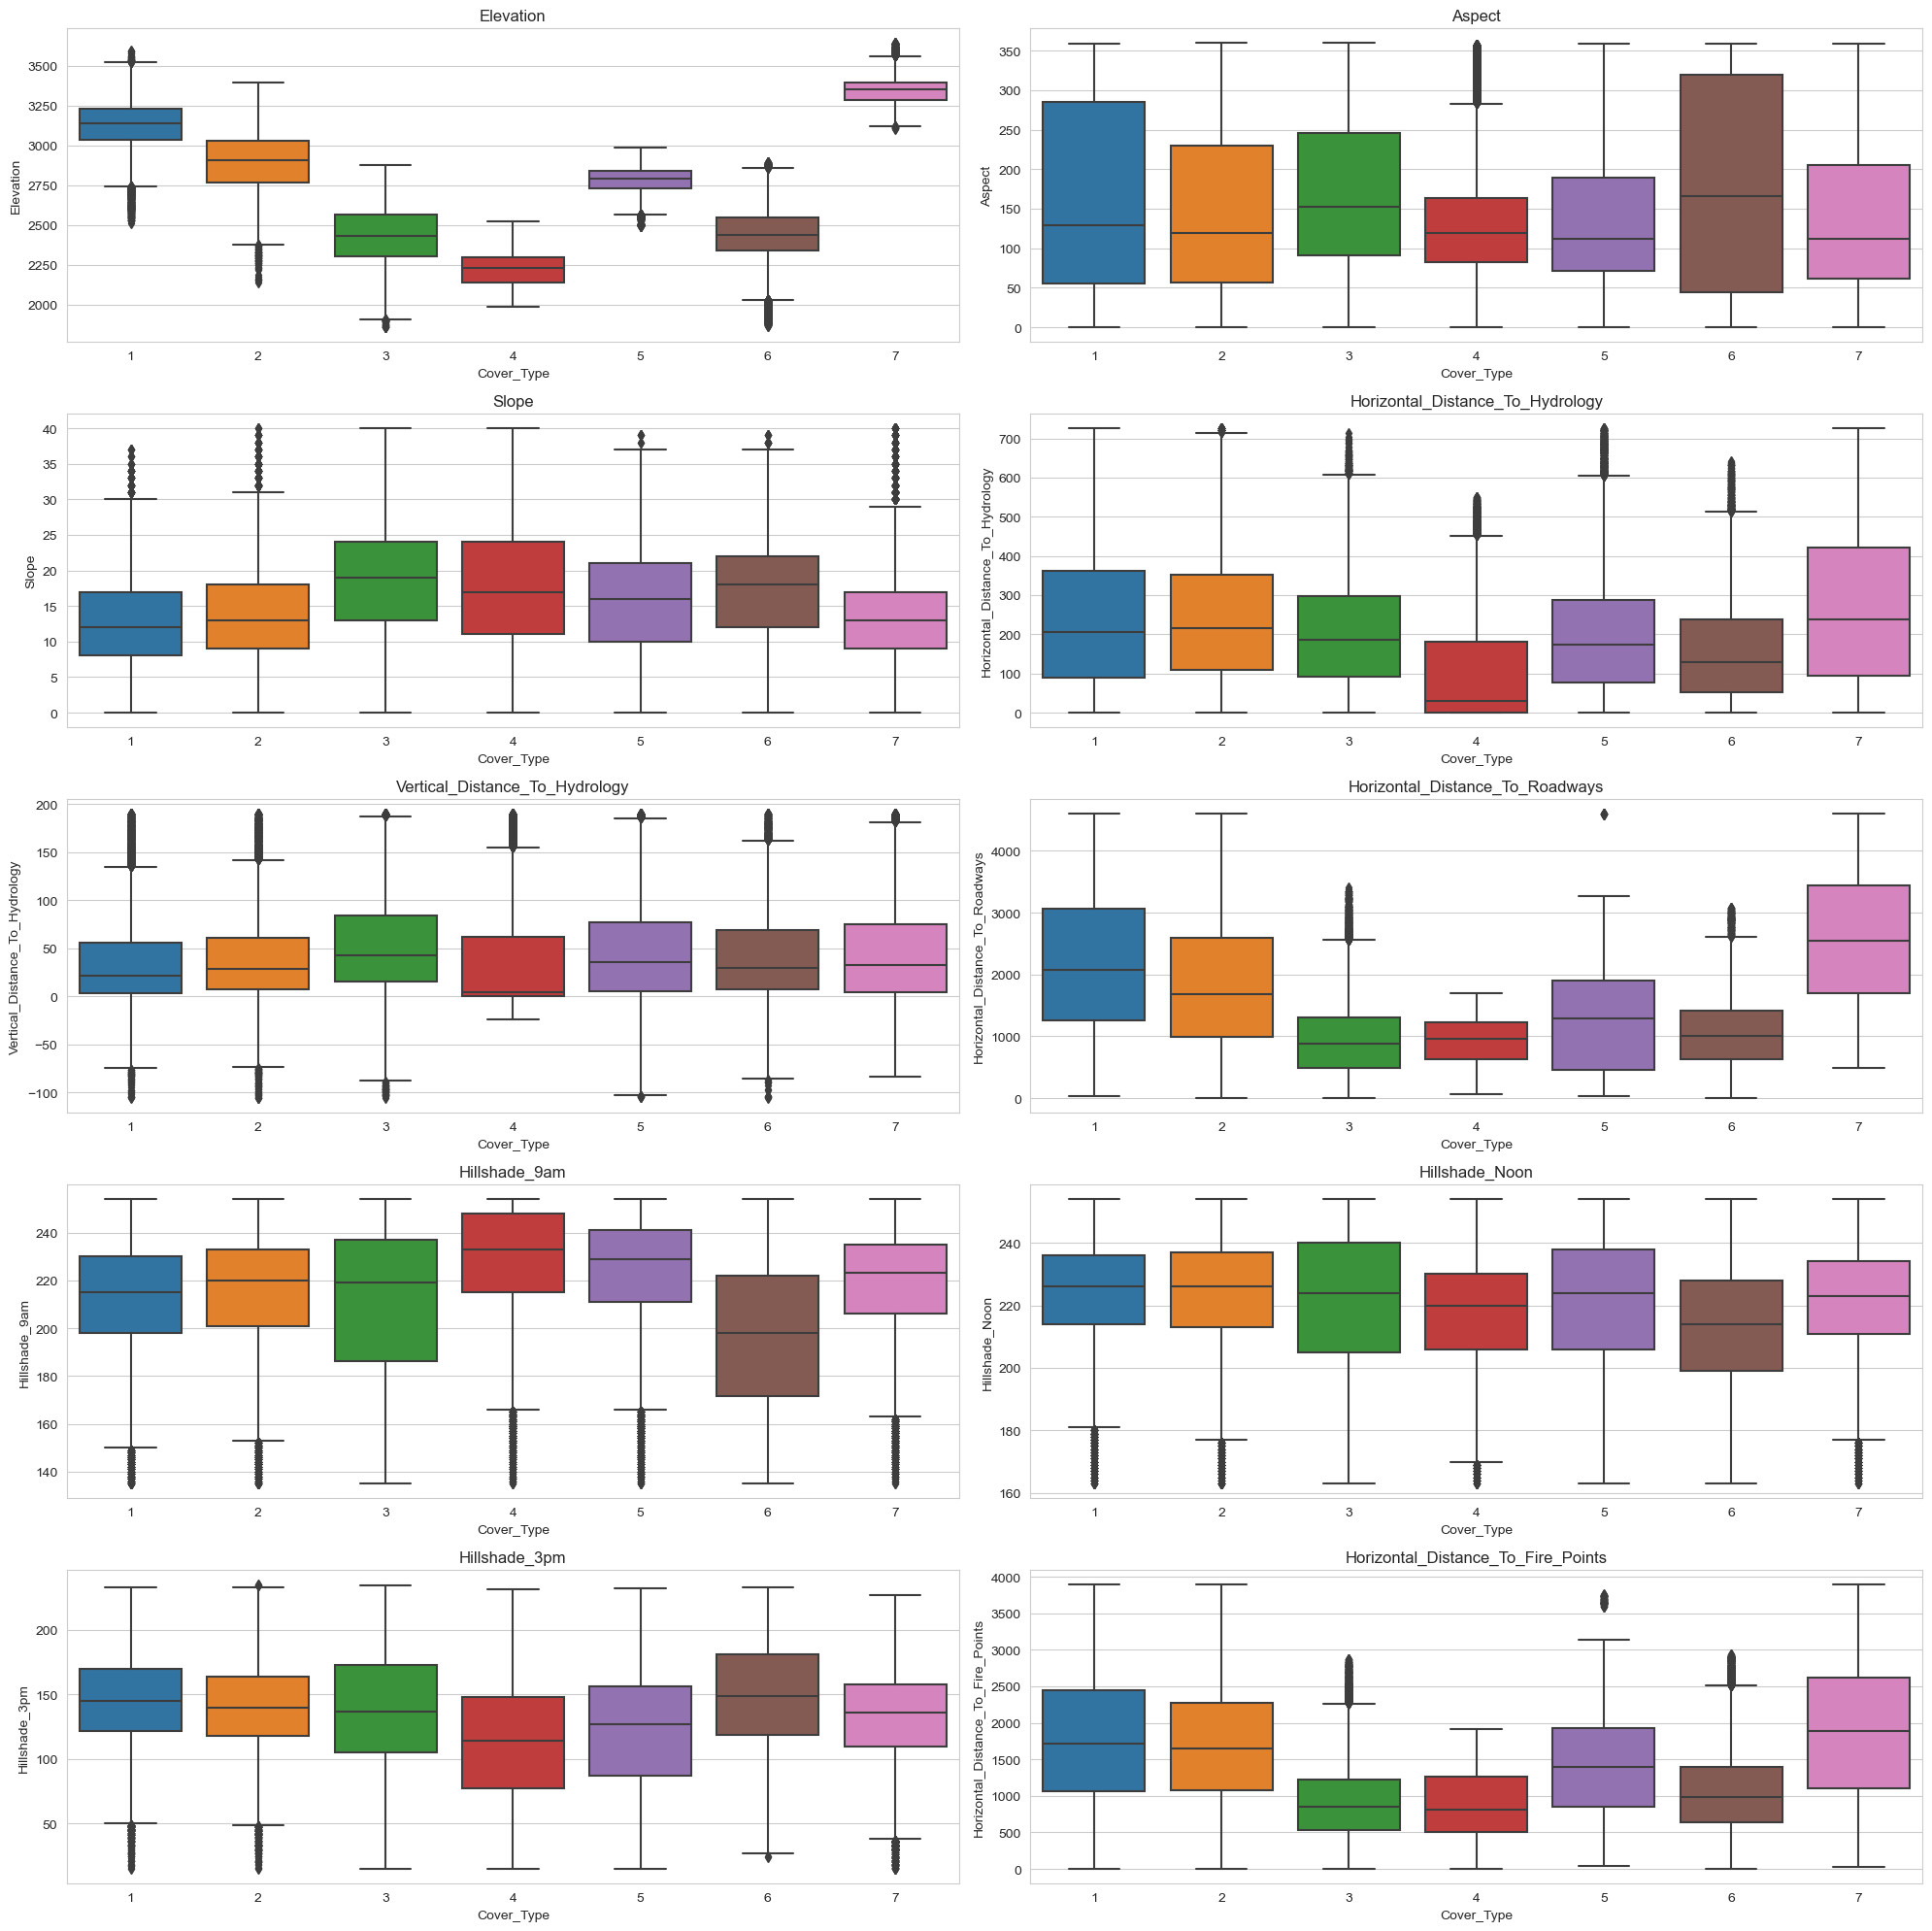

In [21]:
plt.figure(figsize=(20,20))
for i,col in enumerate([
    'Elevation', 'Aspect', 'Slope', 'Horizontal_Distance_To_Hydrology', 
    'Vertical_Distance_To_Hydrology', 'Horizontal_Distance_To_Roadways', 
    'Hillshade_9am', 'Hillshade_Noon', 'Hillshade_3pm', 
    'Horizontal_Distance_To_Fire_Points'],1):
    plt.subplot(5,2,i)
    plt.title(col)
    sns.boxplot(y=df1[col], x=df["Cover_Type"])
    plt.tight_layout()

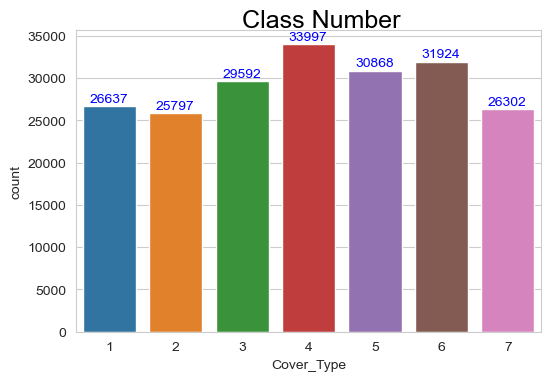

In [22]:
sns.countplot(df1.Cover_Type);
for i,val in enumerate(df1["Cover_Type"].value_counts().sort_index().to_list()):
    plt.text(i-.3,val+500,str(val),color="blue")
    # print(i,val)
plt.text(2,36000,"Class Number",fontdict={"color":"Black","fontsize":18});

In [23]:
df1.Cover_Type.value_counts(1).sort_index()

1   0.1298624687
2   0.1257672450
3   0.1442688807
4   0.1657444288
5   0.1504897205
6   0.1556380017
7   0.1282292545
Name: Cover_Type, dtype: float64

## 2. Data Cleaning

Detect Missing Values and Outliers

### i. Missing Value Detection

In [24]:
df1.isnull().sum().any()

False

ii. Outlier Detection

The columns which have continuous value should be examined in terms of outliers (Watch out for columns that look like continuous but not continuous!). Some algorithms are sensitive to outliers, but some algorithms can tolerate them. You can decide to outlier detection according to the algorithm you will use.

    You can check the outliers shape of continous features with respect to the target (Cover_Type) classes.
    You can check how many outliers are there of each continuous variables.
    The columns which have continuous value should be examined in terms of outliers.
    You can define a function to detect outliers in accordance with the zscore or IQR.
    
### Now, let's take a closer look at correlation of continuous columns.

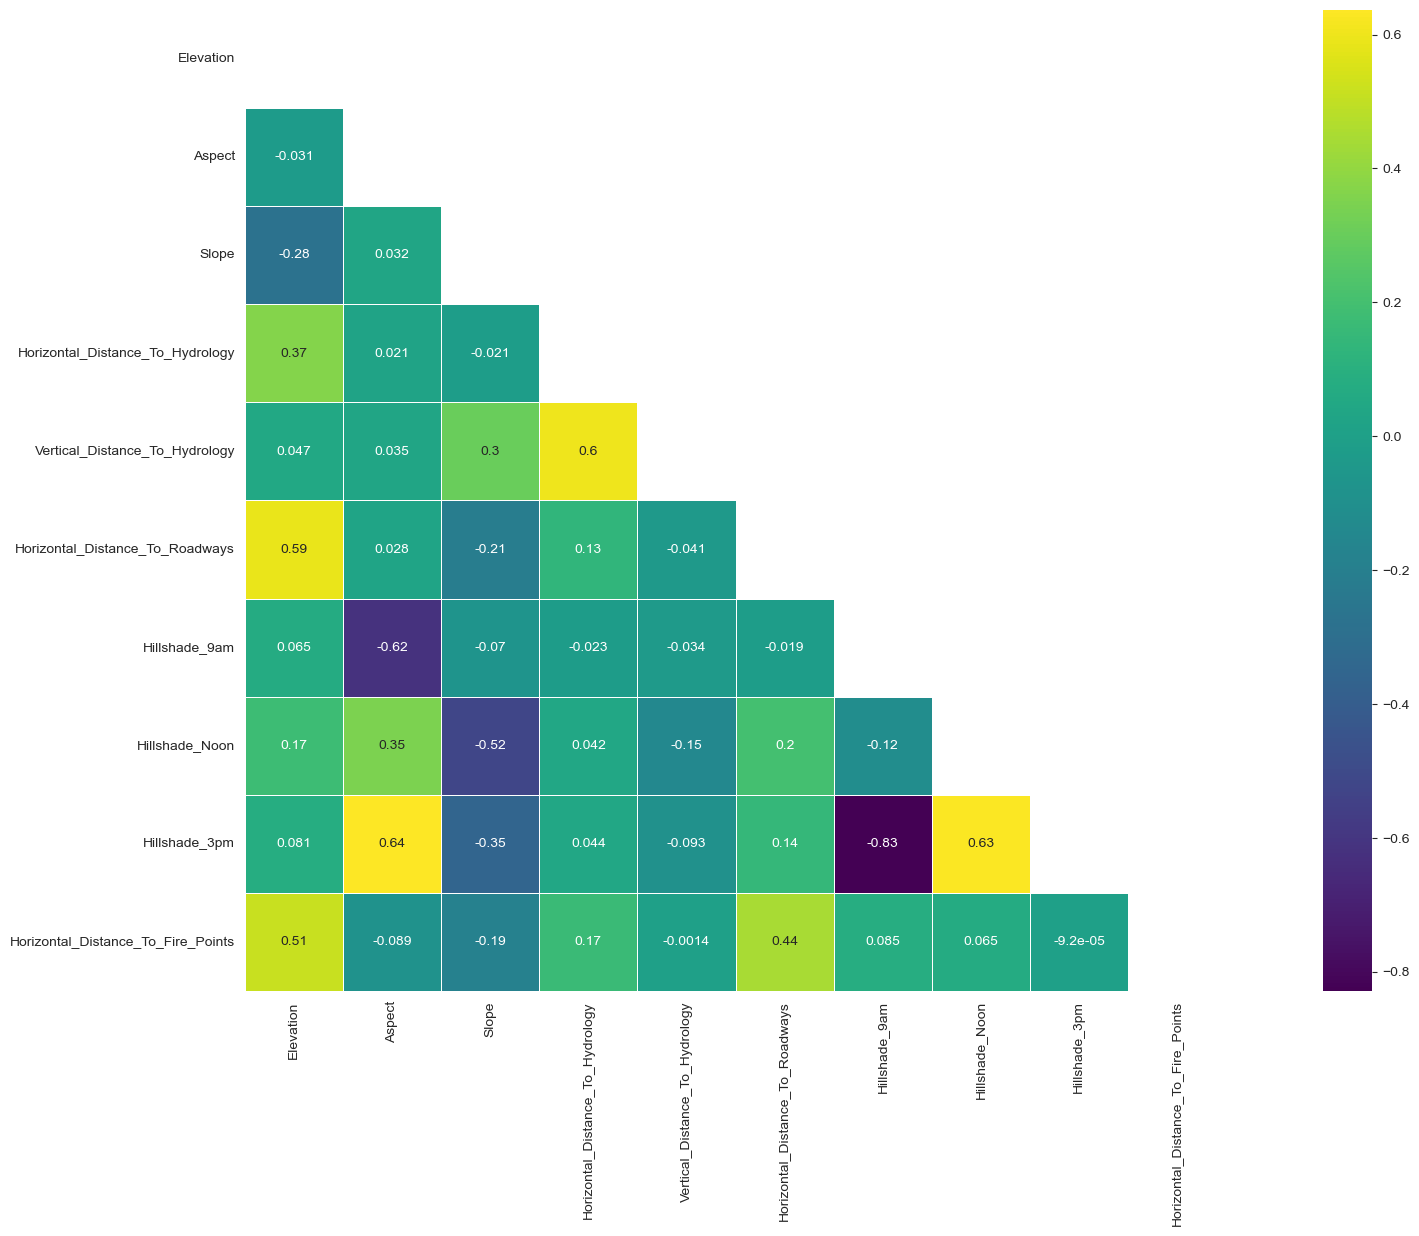

In [25]:
corr = df1[lst].corr()
mask = np.triu(np.ones_like(corr))
plt.figure(figsize=(25, 13))
sns.heatmap(corr, mask=mask, annot=True, cmap="viridis", square=True, linewidths=.5);

## 3. Feature Engineering

### My Plan of Feature Extraction

    First, I decided to produce&transform a new column with Horizontal_Distance_To_Hydrology and Vertical_Distance_To_Hydrology columns. New column will contain the values of Hypotenuse of horizantal and vertical distances.

    As second, we can produce&transform an additional column which contains average of Horizantal Distances to Hydrology and Roadways.

    Third, I decided to transform a new column which contains average of Elevation and Vertical_Distance_To_Hydrology columns. So that, there is no need to have Horizontal_Distance_To_Hydrology and Vertical_Distance_To_Hydrology columns, because I have new columns which represent more value than them. I decide to drop these columns.

    Note that, after seeing the result of the models, there may be a possibility of making minor changes to the features in the modeling phase.

In [26]:
df1["hypo_distance"] = (df1["Horizontal_Distance_To_Hydrology"]**2 + df1["Vertical_Distance_To_Hydrology"]**2)**.5
df1["Average_Dist_Road_Hydro"] = (df1.Horizontal_Distance_To_Hydrology + df1.Horizontal_Distance_To_Roadways)/2 
df1["Average_Elevation_Hydro"] = (df1.Elevation + df1.Vertical_Distance_To_Hydrology) /2

In [27]:
df1.drop([
    "Horizontal_Distance_To_Hydrology", "Vertical_Distance_To_Hydrology",
    "Horizontal_Distance_To_Roadways", "Elevation"
], axis=1, inplace=True)

In [ ]:
# df1= df1.drop(["Hillshade_9am"], axis=1)

In [28]:
numeric_cols = [ col for col in df1.columns if df1[col].nunique() > 7]
numeric_cols

['Aspect',
 'Slope',
 'Hillshade_9am',
 'Hillshade_Noon',
 'Hillshade_3pm',
 'Horizontal_Distance_To_Fire_Points',
 'hypo_distance',
 'Average_Dist_Road_Hydro',
 'Average_Elevation_Hydro']

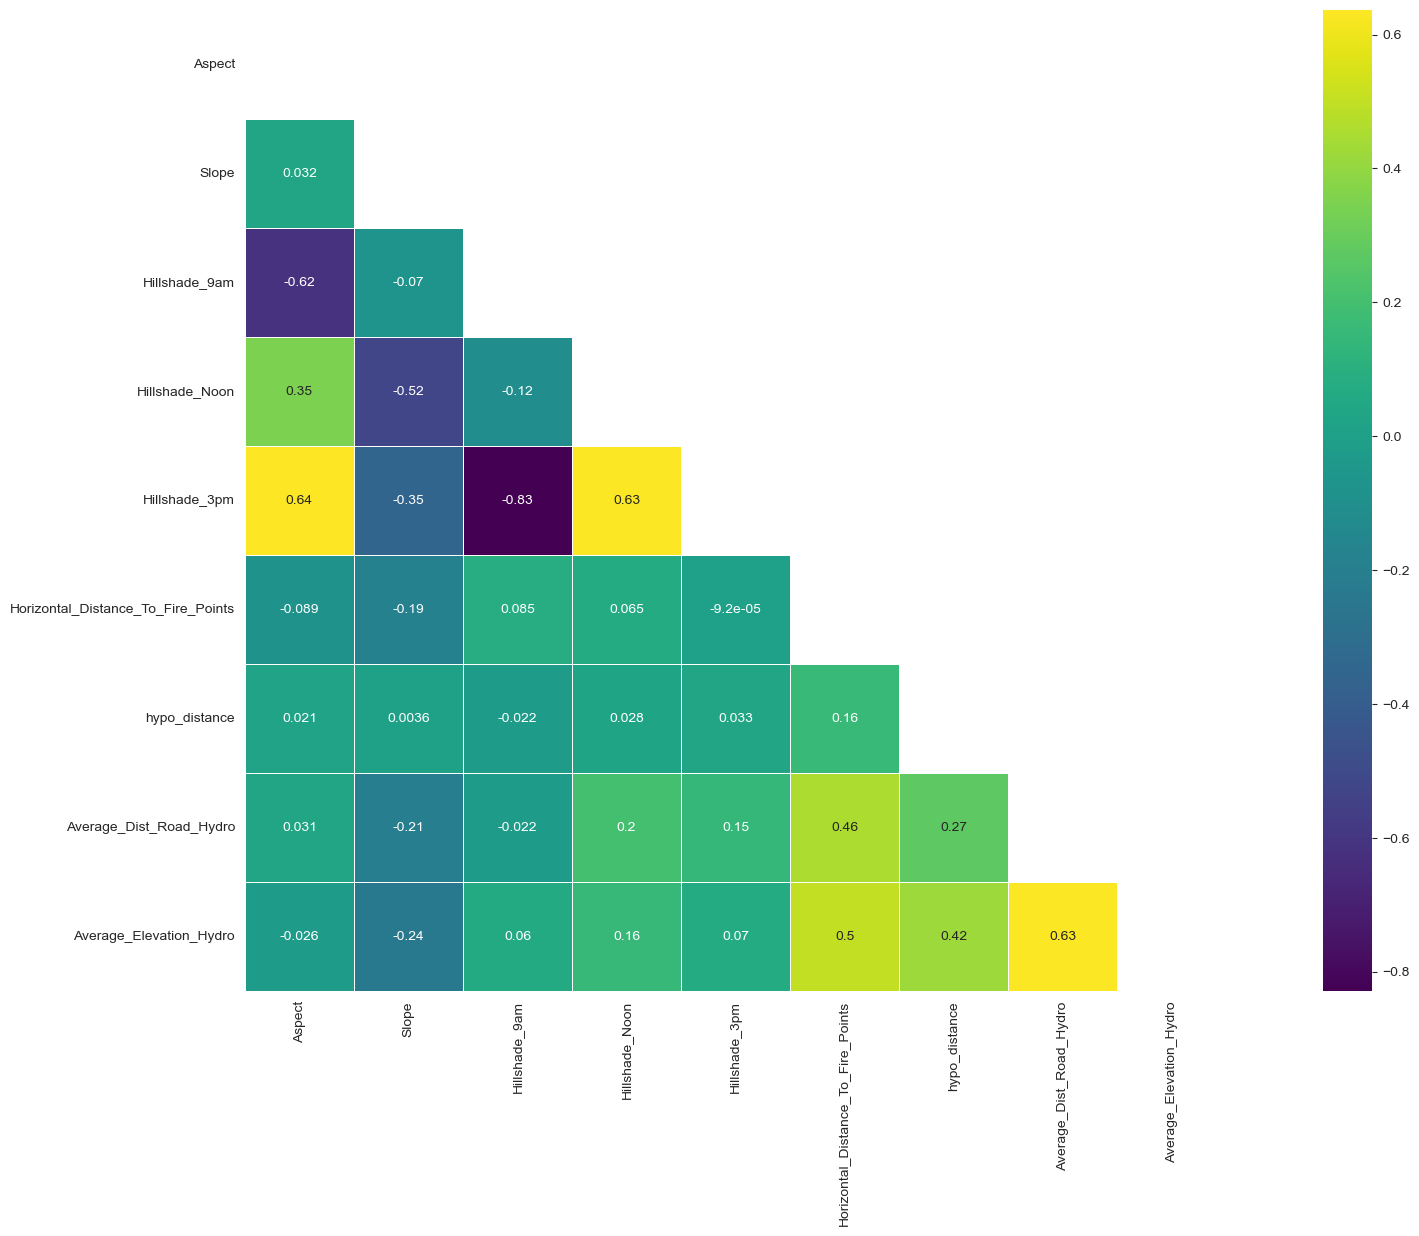

In [29]:
corr = df1[numeric_cols].corr()
mask = np.triu(np.ones_like(corr))
plt.figure(figsize=(25, 13))
sns.heatmap(corr, mask=mask, annot=True, cmap="viridis", square=True, linewidths=.5);

## 4. Prediction (Multi-class Classification)

If you have done, use your data set resulting from Feature Engineering task. If you haven't done Feature Engineering, use the latest version of your data set. In this section, you have two main tasks that apply to each algorithm:

    Model Building and Prediction
        SVM (Use LinearSVC model fromsklearn.svm module)
        Decision Tree (Use DecisionTreeClassifier model from sklearn.tree module)
        Random Forest (Use RandomForestClassifier model from sklearn.ensemble module)
        XGBoost (Use XGBClassifier model fromxgboost module)

    Visualizing the Result

    Use yellowbrick, seaborn or matplotlib modules to visualize the model results.

    Show three plots for the results:
        Class Prediction Error Bar Plot
        Confusion Matrix
        Classification Report
        
### Import Libraries!

In [30]:
from sklearn.model_selection import train_test_split

### Data Preprocessing

    Drop target variable
    Train-Test Split

Note: You can use the train and test data generated here for all algorithms.


In [31]:
X = df.drop("Cover_Type", axis = 1)
y = df["Cover_Type"]

In [33]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, stratify=y, random_state=101)

### Implement Support Vector Machine

    Import the modul
    Fit the model
    Predict the test set
    Visualize and evaluate the result (use yellowbrick module)

Note: You probably won't get a successful result. You may need to make some changes to the model or data. This may be a topic worth investigating, you decide.

In [34]:
from sklearn.svm import SVC, LinearSVC
from sklearn.preprocessing import MinMaxScaler

In [35]:
scaler = MinMaxScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [36]:
model_LSVC = LinearSVC(max_iter=2000)
model_LSVC.fit(X_train_scaled, y_train)
y_pred_test = model_LSVC.predict(X_test_scaled)
y_pred_train = model_LSVC.predict(X_train_scaled)

In [37]:
model_LSVC.score(X_test_scaled,y_test)

0.6708133333333334

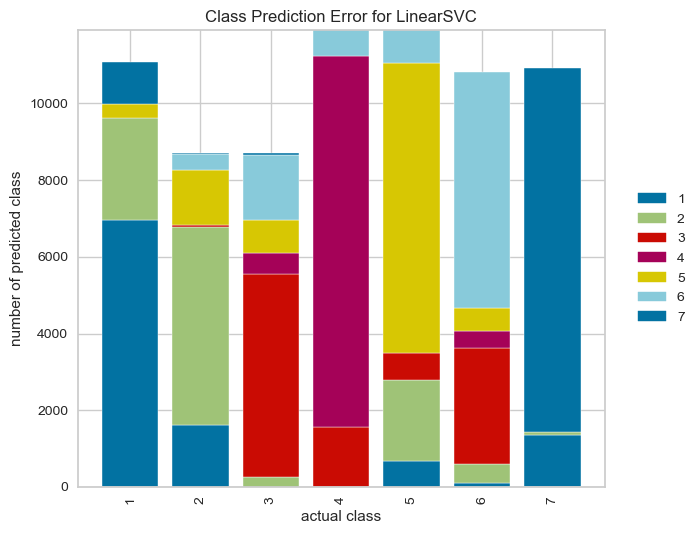

<AxesSubplot:title={'center':'Class Prediction Error for LinearSVC'}, xlabel='actual class', ylabel='number of predicted class'>

In [38]:
from yellowbrick.classifier import ClassPredictionError
visualizer = ClassPredictionError(model_LSVC)

# Fit the training data to the visualizer
visualizer.fit(X_train_scaled, y_train)

# Evaluate the model on the test data
visualizer.score(X_test_scaled, y_test)

# Draw visualization
visualizer.show()

In [39]:
from sklearn.ensemble import BaggingClassifier

In [40]:
model_SVC = SVC(kernel="linear")
model_baggingSVC = BaggingClassifier(model_SVC, n_jobs=-1, n_estimators=5, max_samples=0.1)
model_baggingSVC.fit(X_train_scaled, y_train)
y_pred_test = model_baggingSVC.predict(X_test_scaled)
y_pred_train = model_baggingSVC.predict(X_train_scaled)

In [41]:
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import plot_confusion_matrix

TEST REPORT
[[7131 1937   11    0  420   51 1201]
 [2234 5841  232    5 1991  375   56]
 [   0  111 5576 1610  360 2960    0]
 [   0    0  384 9872    0  403    0]
 [ 122 1298  370    0 8736  298    0]
 [   0  240 2127  939  325 7077    0]
 [1425    2   34    0    6    0 9240]]
              precision    recall  f1-score   support

           1       0.65      0.66      0.66     10751
           2       0.62      0.54      0.58     10734
           3       0.64      0.53      0.58     10617
           4       0.79      0.93      0.86     10659
           5       0.74      0.81      0.77     10824
           6       0.63      0.66      0.65     10708
           7       0.88      0.86      0.87     10707

    accuracy                           0.71     75000
   macro avg       0.71      0.71      0.71     75000
weighted avg       0.71      0.71      0.71     75000




 -*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*
TRAIN REPORT
[[16630  4577    25     0   977   101  2775]
 

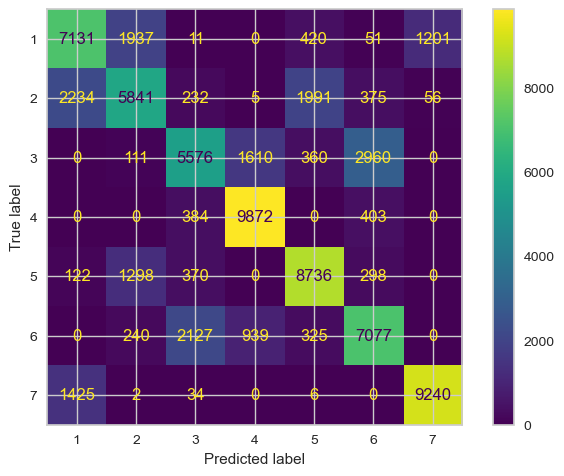

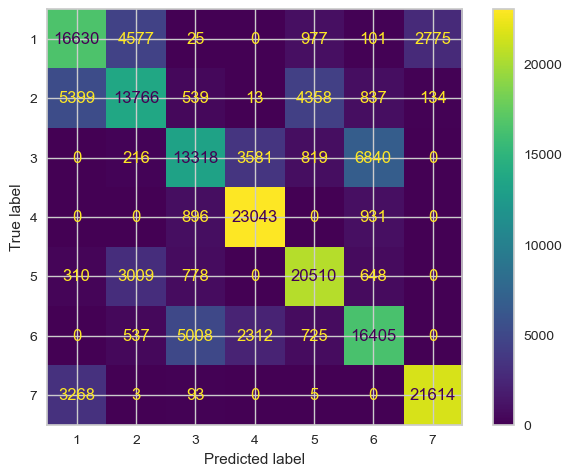

In [42]:
print("TEST REPORT")
print(confusion_matrix(y_test, y_pred_test))
print(classification_report(y_test, y_pred_test))
plot_confusion_matrix(model_baggingSVC, X_test_scaled, y_test);

print("\n"*3, "-*"*30)
print("TRAIN REPORT")
print(confusion_matrix(y_train, y_pred_train))
print(classification_report(y_train, y_pred_train))
plot_confusion_matrix(model_baggingSVC, X_train_scaled, y_train);

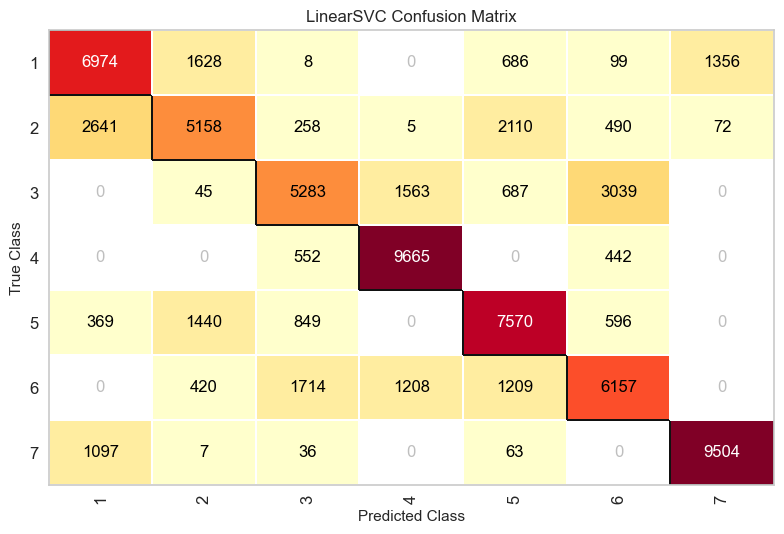

<AxesSubplot:title={'center':'LinearSVC Confusion Matrix'}, xlabel='Predicted Class', ylabel='True Class'>

In [43]:
from yellowbrick.classifier import ConfusionMatrix
cm = ConfusionMatrix(model_LSVC)
cm.fit(X_train_scaled, y_train)
cm.score(X_test_scaled, y_test)
cm.show()

In [44]:
from sklearn.metrics import f1_score, accuracy_score
scores = {}

In [45]:
y_test.shape, y_pred_test.shape

((75000,), (75000,))

In [46]:
y_pred_test = model_LSVC.predict(X_test_scaled)
y_pred_train = model_LSVC.predict(X_train_scaled)
scores["model_LSVC"]={}
scores["model_LSVC"]["f1_score_test"] = f1_score(y_test, y_pred_test, average="macro")
scores["model_LSVC"]["f1_score_train"] = f1_score(y_train, y_pred_train, average="macro")
scores["model_LSVC"]["accuracy_score_test"] = accuracy_score(y_test, y_pred_test)
scores["model_LSVC"]["accuracy_score_train"] = accuracy_score(y_train, y_pred_train)
scores

{'model_LSVC': {'f1_score_test': 0.6654127085964525,
  'f1_score_train': 0.6687316077041535,
  'accuracy_score_test': 0.6708133333333334,
  'accuracy_score_train': 0.6739942857142858}}

### Implement Decision Tree Classifier

    Import the modul
    Fit the model
    Predict the test set
    Visualize and evaluate the result (use yellowbrick module)

In [47]:
from sklearn.tree import DecisionTreeClassifier

In [48]:
model_Tree = DecisionTreeClassifier()
model_Tree.fit(X_train , y_train)

DecisionTreeClassifier()

In [49]:
y_pred_test = model_Tree.predict(X_test)
y_pred_train = model_Tree.predict(X_train)
scores["model_Tree"]={}
scores["model_Tree"]["f1_score_test"] = f1_score(y_test, y_pred_test, average="macro")
scores["model_Tree"]["f1_score_train"] = f1_score(y_train, y_pred_train, average="macro")
scores["model_Tree"]["accuracy_score_test"] = accuracy_score(y_test, y_pred_test)
scores["model_Tree"]["accuracy_score_train"] = accuracy_score(y_train, y_pred_train)

In [50]:
scores["model_LSVC"], scores["model_Tree"],

({'f1_score_test': 0.6654127085964525,
  'f1_score_train': 0.6687316077041535,
  'accuracy_score_test': 0.6708133333333334,
  'accuracy_score_train': 0.6739942857142858},
 {'f1_score_test': 0.932987605499947,
  'f1_score_train': 1.0,
  'accuracy_score_test': 0.9333333333333333,
  'accuracy_score_train': 1.0})

In [51]:
pd.DataFrame(scores)[["model_Tree","model_LSVC"]].T

,f1_score_test,f1_score_train,accuracy_score_test,accuracy_score_train
model_Tree,0.9329876055,1.0000000000,0.9333333333,1.0000000000
model_LSVC,0.6654127086,0.6687316077,0.6708133333,0.6739942857


In [54]:
def eval_model(model,X_train, y_train, X_test, y_test,y_pred_test,y_pred_train):
    cm = ConfusionMatrix(model)
    cm.fit(X_train, y_train)
    cm.score(X_test, y_test)
    cm.show()
    print("TEST REPORT")
    # print(confusion_matrix(y_test, y_pred_test))
    print(classification_report(y_test, y_pred_test))
    
    print("\n"*3, "-*"*30)
    print("TRAIN REPORT")
    cm.score(X_train, y_train)
    cm.show()
    # print(confusion_matrix(y_train, y_pred_train))
    print(classification_report(y_train, y_pred_train))

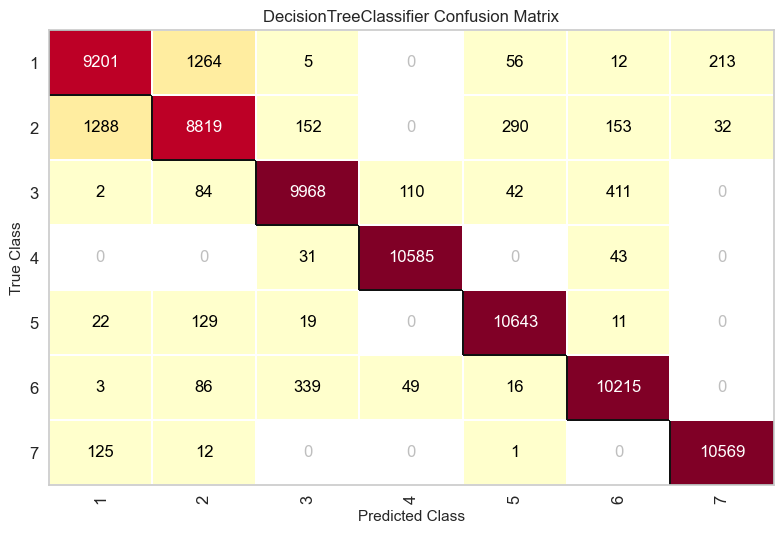

TEST REPORT
              precision    recall  f1-score   support

           1       0.86      0.86      0.86     10751
           2       0.85      0.82      0.83     10734
           3       0.95      0.94      0.94     10617
           4       0.99      0.99      0.99     10659
           5       0.96      0.98      0.97     10824
           6       0.94      0.95      0.95     10708
           7       0.98      0.99      0.98     10707

    accuracy                           0.93     75000
   macro avg       0.93      0.93      0.93     75000
weighted avg       0.93      0.93      0.93     75000




 -*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*
TRAIN REPORT
              precision    recall  f1-score   support

           1       1.00      1.00      1.00     25085
           2       1.00      1.00      1.00     25046
           3       1.00      1.00      1.00     24774
           4       1.00      1.00      1.00     24870
           5       1.00      1.00      1.0

In [55]:
eval_model(model_Tree,X_train, y_train, X_test, y_test,y_pred_test,y_pred_train)

In [60]:
model = DecisionTreeClassifier(random_state=101)
from sklearn.model_selection import   cross_validate
scoress = cross_validate(model, X_train, y_train, scoring = ["accuracy", "f1_macro"], cv = 10)
df_scores = pd.DataFrame(scoress, index = range(1, 11))

In [61]:
from sklearn.model_selection import GridSearchCV

In [62]:
model = DecisionTreeClassifier()
param_grid = {"splitter":["best", "random"],
              "max_features":[None, "auto", "log2", 2, 3,4, 5,6, 7],
              "max_depth": [None, 2,3, 4, 5],
              "min_samples_leaf": [1, 2, 3, 4, 5, 6,7],
              "min_samples_split": [2, 3, 5, 6, 7,8,9]}
model_Tree_gs = GridSearchCV(estimator=model,
                          param_grid=param_grid,
                          scoring='f1_macro',
                          cv=5,
                          n_jobs = -1)
model_Tree_gs.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'max_depth': [None, 2, 3, 4, 5],
                         'max_features': [None, 'auto', 'log2', 2, 3, 4, 5, 6,
                                          7],
                         'min_samples_leaf': [1, 2, 3, 4, 5, 6, 7],
                         'min_samples_split': [2, 3, 5, 6, 7, 8, 9],
                         'splitter': ['best', 'random']},
             scoring='f1_macro')

In [63]:
model_Tree_gs.best_params_

{'max_depth': None,
 'max_features': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'splitter': 'best'}

In [64]:
model_Tree_gs.best_score_

0.9218277717735912

In [65]:
model_Tree_tuned = DecisionTreeClassifier(max_depth= None, max_features= None, min_samples_leaf= 1, min_samples_split = 2, splitter='best')
model_Tree_tuned.fit(X_train , y_train)

DecisionTreeClassifier()

In [66]:
y_pred_test = model_Tree_tuned.predict(X_test)
y_pred_train = model_Tree_tuned.predict(X_train)
scores["model_Tree_tuned"]={}
scores["model_Tree_tuned"]["f1_score_test"] = f1_score(y_test, y_pred_test, average="macro")
scores["model_Tree_tuned"]["f1_score_train"] = f1_score(y_train, y_pred_train, average="macro")
scores["model_Tree_tuned"]["accuracy_score_test"] = accuracy_score(y_test, y_pred_test)
scores["model_Tree_tuned"]["accuracy_score_train"] = accuracy_score(y_train, y_pred_train)
#

In [67]:
pd.DataFrame(scores)

,model_LSVC,model_Tree,model_Tree_tuned
f1_score_test,0.6654127086,0.9329876055,0.9328746628
f1_score_train,0.6687316077,1.0000000000,1.0000000000
accuracy_score_test,0.6708133333,0.9333333333,0.9332266667
accuracy_score_train,0.6739942857,1.0000000000,1.0000000000


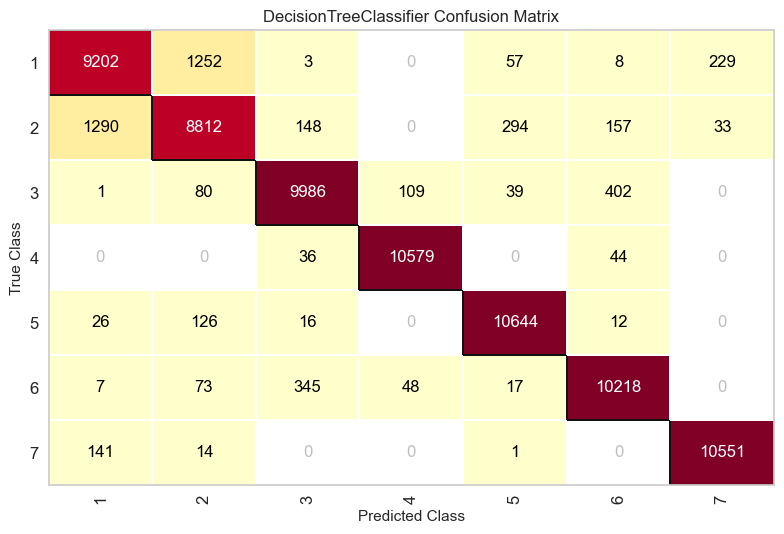

TEST REPORT
              precision    recall  f1-score   support

           1       0.86      0.86      0.86     10751
           2       0.85      0.82      0.84     10734
           3       0.95      0.94      0.94     10617
           4       0.99      0.99      0.99     10659
           5       0.96      0.98      0.97     10824
           6       0.94      0.95      0.95     10708
           7       0.98      0.99      0.98     10707

    accuracy                           0.93     75000
   macro avg       0.93      0.93      0.93     75000
weighted avg       0.93      0.93      0.93     75000




 -*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*
TRAIN REPORT
              precision    recall  f1-score   support

           1       1.00      1.00      1.00     25085
           2       1.00      1.00      1.00     25046
           3       1.00      1.00      1.00     24774
           4       1.00      1.00      1.00     24870
           5       1.00      1.00      1.0

In [68]:
eval_model(model_Tree_tuned,X_train, y_train, X_test,
           y_test,y_pred_test,y_pred_train)

In [69]:
model_Tree_bagg = BaggingClassifier(DecisionTreeClassifier(), n_jobs=-1, max_samples=.1,n_estimators=20)

model_Tree_bagg.fit(X_train , y_train)
y_pred_test = model_Tree_bagg.predict(X_test)
y_pred_train = model_Tree_bagg.predict(X_train)
print(
    "f1_train:", f1_score(y_train,y_pred_train,average="macro"),
    "f1_test:", f1_score(y_test,y_pred_test,average="macro"),
    "\n",
    "Accuracy_train:", accuracy_score(y_train,y_pred_train),
    "Accuracy_test:", accuracy_score(y_test,y_pred_test)    
      )

f1_train: 0.929140869687606 f1_test: 0.9085281217734799 
 Accuracy_train: 0.9301314285714286 Accuracy_test: 0.91004


In [70]:
scores["model_Tree_bagg"]={}
scores["model_Tree_bagg"]["f1_score_test"] = f1_score(y_test, y_pred_test, average="macro")
scores["model_Tree_bagg"]["f1_score_train"] = f1_score(y_train, y_pred_train, average="macro")
scores["model_Tree_bagg"]["accuracy_score_test"] = accuracy_score(y_test, y_pred_test)
scores["model_Tree_bagg"]["accuracy_score_train"] = accuracy_score(y_train, y_pred_train)
pd.DataFrame(scores)[["model_LSVC","model_Tree","model_Tree_tuned","model_Tree_bagg"]].T

,f1_score_test,f1_score_train,accuracy_score_test,accuracy_score_train
model_LSVC,0.6654127086,0.6687316077,0.6708133333,0.6739942857
model_Tree,0.9329876055,1.0000000000,0.9333333333,1.0000000000
model_Tree_tuned,0.9328746628,1.0000000000,0.9332266667,1.0000000000
model_Tree_bagg,0.9085281218,0.9291408697,0.9100400000,0.9301314286


### Implement Random Forest Classifier

    Import the modul
    Fit the model
    Predict the test set
    Visualize and evaluate the result (use yellowbrick module)

In [71]:
from sklearn.ensemble import RandomForestClassifier
model_RF = RandomForestClassifier(n_estimators=100)
model_RF.fit(X_train, y_train)

RandomForestClassifier()

In [72]:
y_pred_test = model_RF.predict(X_test)
y_pred_train = model_RF.predict(X_train)

scores["model_RF"]={}
scores["model_RF"]["f1_score_test"] = f1_score(y_test, y_pred_test, average="macro")
scores["model_RF"]["f1_score_train"] = f1_score(y_train, y_pred_train, average="macro")
scores["model_RF"]["accuracy_score_test"] = accuracy_score(y_test, y_pred_test)
scores["model_RF"]["accuracy_score_train"] = accuracy_score(y_train, y_pred_train)

pd.DataFrame(scores)[["model_LSVC","model_Tree","model_Tree_tuned","model_Tree_bagg","model_RF"]].T

,f1_score_test,f1_score_train,accuracy_score_test,accuracy_score_train
model_LSVC,0.6654127086,0.6687316077,0.6708133333,0.6739942857
model_Tree,0.9329876055,1.0000000000,0.9333333333,1.0000000000
model_Tree_tuned,0.9328746628,1.0000000000,0.9332266667,1.0000000000
model_Tree_bagg,0.9085281218,0.9291408697,0.9100400000,0.9301314286
model_RF,0.9585628476,1.0000000000,0.9588800000,1.0000000000


In [73]:
param_grid = {'n_estimators':[30,100,200],
             'criterion': ["gini","entropy"],
             'max_depth':[10,13,16],
             'min_samples_split':[2,6,10],
             }
rf_model = RandomForestClassifier()
rf_grid_model = GridSearchCV(rf_model,
                             param_grid,
                             verbose=2,
                             scoring="f1_macro",
                             refit=True,
                             n_jobs=-1)

rf_grid_model.fit(X_train,y_train)

Fitting 5 folds for each of 54 candidates, totalling 270 fits


GridSearchCV(estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [10, 13, 16],
                         'min_samples_split': [2, 6, 10],
                         'n_estimators': [30, 100, 200]},
             scoring='f1_macro', verbose=2)

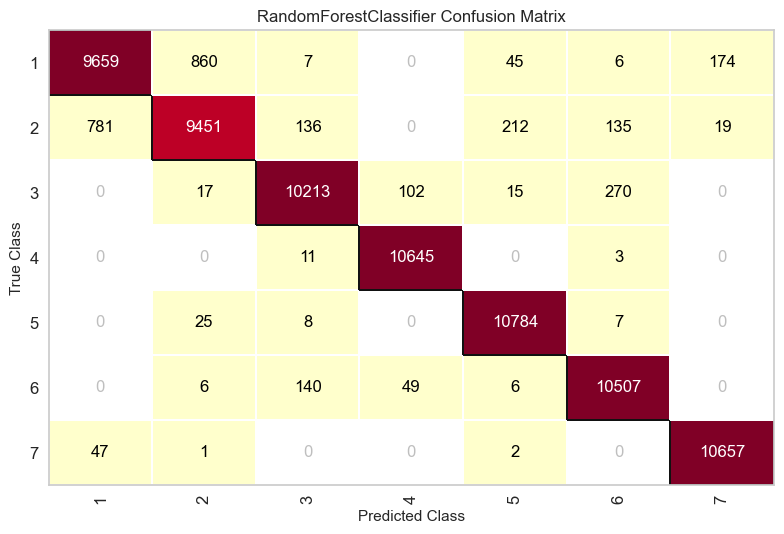

TEST REPORT
              precision    recall  f1-score   support

           1       0.92      0.90      0.91     10751
           2       0.91      0.88      0.90     10734
           3       0.97      0.96      0.97     10617
           4       0.99      1.00      0.99     10659
           5       0.97      1.00      0.99     10824
           6       0.96      0.98      0.97     10708
           7       0.98      1.00      0.99     10707

    accuracy                           0.96     75000
   macro avg       0.96      0.96      0.96     75000
weighted avg       0.96      0.96      0.96     75000




 -*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*
TRAIN REPORT
              precision    recall  f1-score   support

           1       1.00      1.00      1.00     25085
           2       1.00      1.00      1.00     25046
           3       1.00      1.00      1.00     24774
           4       1.00      1.00      1.00     24870
           5       1.00      1.00      1.0

In [74]:
eval_model(model_RF,X_train, y_train, X_test, 
           y_test,y_pred_test,y_pred_train)

In [75]:
model = model_RF
y_pred_test = model.predict(X_test)
y_pred_train = model.predict(X_train)
scores["model_RF"]={}
scores["model_RF"]["f1_score_test"] = f1_score(y_test, y_pred_test, average="macro")
scores["model_RF"]["f1_score_train"] = f1_score(y_train, y_pred_train, average="macro")
scores["model_RF"]["accuracy_score_test"] = accuracy_score(y_test, y_pred_test)
scores["model_RF"]["accuracy_score_train"] = accuracy_score(y_train, y_pred_train)

In [76]:
pd.DataFrame(scores)

,model_LSVC,model_Tree,model_Tree_tuned,model_Tree_bagg,model_RF
f1_score_test,0.6654127086,0.9329876055,0.9328746628,0.9085281218,0.9585628476
f1_score_train,0.6687316077,1.0000000000,1.0000000000,0.9291408697,1.0000000000
accuracy_score_test,0.6708133333,0.9333333333,0.9332266667,0.9100400000,0.9588800000
accuracy_score_train,0.6739942857,1.0000000000,1.0000000000,0.9301314286,1.0000000000


### Implement XGBoost Classifer

    Import the modul
    Fit the model
    Predict the test set
    Visualize and evaluate the result (use yellowbrick module)

In [77]:
from xgboost import XGBClassifier
model_XGB = XGBClassifier().fit(X_train , y_train)
y_pred_test = model_XGB.predict(X_test)
y_pred_train = model_XGB.predict(X_train)
scores["model_XGB"]={}
scores["model_XGB"]["f1_score_test"] = f1_score(y_test, y_pred_test, average="macro")
scores["model_XGB"]["f1_score_train"] = f1_score(y_train, y_pred_train, average="macro")
scores["model_XGB"]["accuracy_score_test"] = accuracy_score(y_test, y_pred_test)
scores["model_XGB"]["accuracy_score_train"] = accuracy_score(y_train, y_pred_train)
pd.DataFrame(scores)

[03:08:40] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


,model_LSVC,model_Tree,model_Tree_tuned,model_Tree_bagg,model_RF,model_XGB
f1_score_test,0.6654127086,0.9329876055,0.9328746628,0.9085281218,0.9585628476,0.9215544659
f1_score_train,0.6687316077,1.0000000000,1.0000000000,0.9291408697,1.0000000000,0.9402732190
accuracy_score_test,0.6708133333,0.9333333333,0.9332266667,0.9100400000,0.9588800000,0.9225066667
accuracy_score_train,0.6739942857,1.0000000000,1.0000000000,0.9301314286,1.0000000000,0.9408742857


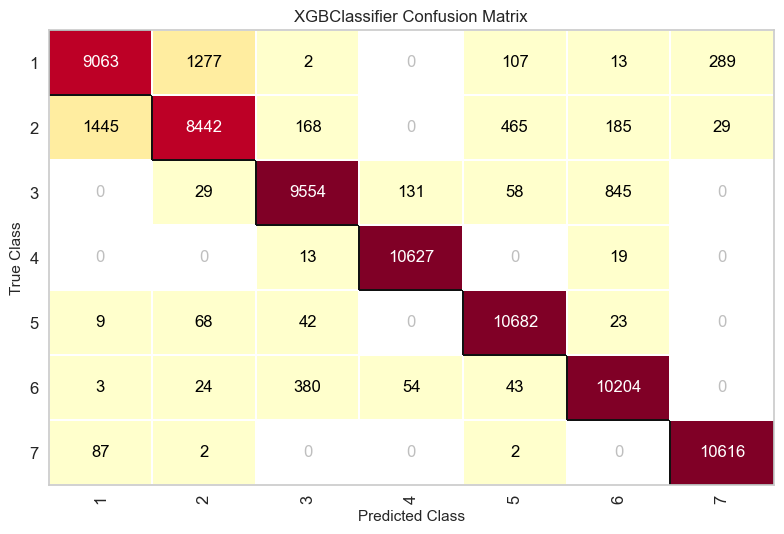

TEST REPORT
              precision    recall  f1-score   support

           1       0.85      0.84      0.85     10751
           2       0.86      0.79      0.82     10734
           3       0.94      0.90      0.92     10617
           4       0.98      1.00      0.99     10659
           5       0.94      0.99      0.96     10824
           6       0.90      0.95      0.93     10708
           7       0.97      0.99      0.98     10707

    accuracy                           0.92     75000
   macro avg       0.92      0.92      0.92     75000
weighted avg       0.92      0.92      0.92     75000




 -*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*
TRAIN REPORT
              precision    recall  f1-score   support

           1       0.88      0.88      0.88     25085
           2       0.90      0.83      0.86     25046
           3       0.96      0.92      0.94     24774
           4       0.99      1.00      1.00     24870
           5       0.95      0.99      0.9

In [78]:
eval_model(model_XGB,X_train, y_train, 
           X_test, y_test,y_pred_test,y_pred_train)

In [79]:
fi = pd.DataFrame(model_XGB.feature_importances_, 
                  index=list(X_train.columns), columns=["fi"])
fi = fi.sort_values("fi",ascending=False)
fi

,fi
Soil_Type_10,0.0852723569
Elevation,0.0830759257
Wilderness_Area_4,0.0754802078
Soil_Type_12,0.0751364604
Soil_Type_30,0.0727973059
Soil_Type_3,0.0593393184
Soil_Type_39,0.0424192101
Soil_Type_4,0.0414851420
Soil_Type_13,0.0335297212
Wilderness_Area_1,0.0316174328


### Compare The Models

So far, you have created a multi-classifier model with 4 different algorithms and made predictions. You can observe the performance of the models together with a barplot of your choice.

    Which algorithm did you achieve the highest prediction performance with?
    What could be the factors that cause this? What are the principles of the most successful algorithm and its differences from other algorithms?

In contrast;

    Which algorithm did you achieve the lowest prediction performance with?
    What could be the factors that cause this? What are the principles of the most successful algorithm and its differences from other algorithms?

The answers you will look for to these questions will increase your gains from Machine Learning course.

## Accuracy Comparison

<AxesSubplot:>

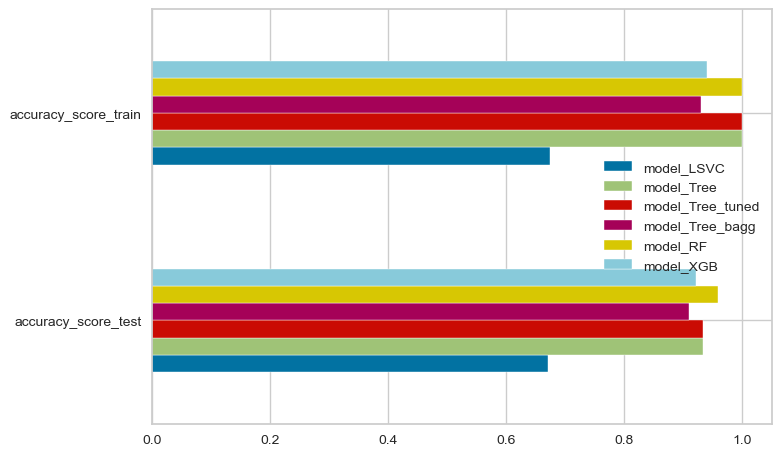

In [80]:
comp = pd.DataFrame(scores)
comp.loc[["accuracy_score_test","accuracy_score_train"]].plot.barh()

## F1 Score Comparison

<AxesSubplot:>

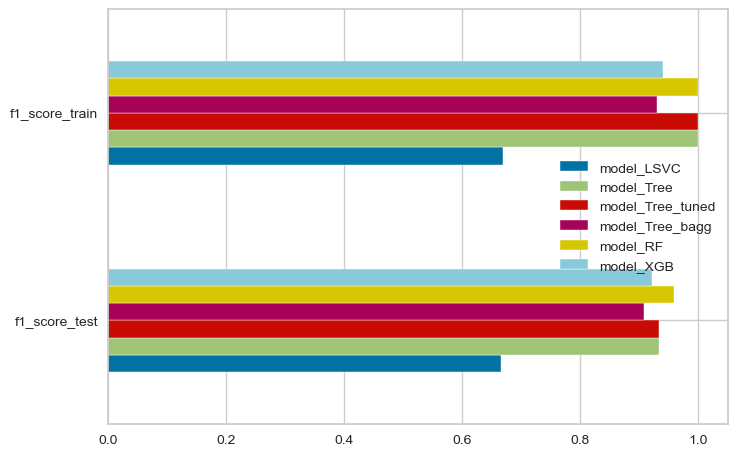

In [81]:
comp.loc[["f1_score_test","f1_score_train"]].plot.barh()